# <center> __M1 Info, Algorithmes et traitement de données__ </center>
# <center> __T.P. Partitionnement Hiérarchique Agglomératif__ </center>
# <center> *Calvin Massonnet* </center>

In [10]:
#@title Matrice de similarité
import numpy as np
similitude = np.array([
                       [10, 6, 0, 0, 0, 0, 0, 0, 0], # arabe
                       [6, 10, 0, 0, 0, 0, 0, 0, 0], # hebreu
                       [0, 0, 10, 5, 3, 3, 1, 1, 0], # sanskrit
                       [0, 0, 5, 10, 1, 2, 1, 1, 0], # avestique
                       [0, 0, 3, 1, 10, 4, 1, 2, 0], # grec classique
                       [0, 0, 3, 2, 4, 10, 1, 4, 0], # latin
                       [0, 0, 1, 1, 1, 1, 10, 1, 0], # gotique
                       [0, 0, 1, 1, 2, 4, 1, 10, 0], # irlandais ancien
                       [0, 0, 0, 0, 0, 0, 0, 0, 10]] # turc
                     )

labels_languages = ["arabe", "hébreu", "sanskrit", "avestique", "grec classique", "latin", "gotique", "irlandais ancien", "turc"]

print(similitude)
print()
print("Labels : ")
print(labels_languages)

[[10  6  0  0  0  0  0  0  0]
 [ 6 10  0  0  0  0  0  0  0]
 [ 0  0 10  5  3  3  1  1  0]
 [ 0  0  5 10  1  2  1  1  0]
 [ 0  0  3  1 10  4  1  2  0]
 [ 0  0  3  2  4 10  1  4  0]
 [ 0  0  1  1  1  1 10  1  0]
 [ 0  0  1  1  2  4  1 10  0]
 [ 0  0  0  0  0  0  0  0 10]]

Labels : 
['arabe', 'hébreu', 'sanskrit', 'avestique', 'grec classique', 'latin', 'gotique', 'irlandais ancien', 'turc']


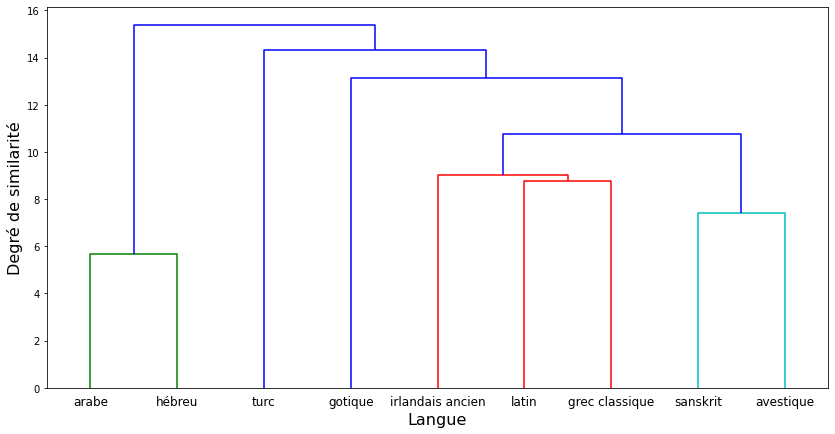

In [11]:
#@title Affichage du dendrogramme attendu
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

plt.figure(figsize=(14,7))
plt.xlabel('Langue', fontsize=16)
plt.ylabel('Degré de similarité', fontsize=16)
links = linkage(similitude, method='single', optimal_ordering=True)
dendrogram(links, orientation='top', labels=labels_languages)
plt.show()

Par défaut, la méthode "linkage()" utilise un algorithme d'arbre couvrant de poids minimal (minimum spanning tree) d'une complexité O(n²).
<br><br>
Cette même méthode utilise également un algorithme d'optimisation de l'ordonnancement des feuilles (optimal leaf ordering) lorsque "optimal_ordering" est à vrai afin de rendre un affichage plus intuitif en minimisant la distance entre chaque objet ayant un lien avec un autre. Cet algorithme est à éviter avec des données trop importantes, pouvant parfois être lent.
<br><br>
À noter que différentes méthodes peuvent être utilisées pour le calcul de la distance entre classes en modifiant l'argument "method". Par défaut, la méthode "single" est utilisée. Elle choisit la distance minimum entre deux classes.
<br><br>
Documentation : 
<br>
 - "linkage()" : https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
<br>
 - "optimal leaf ordering" : https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.optimal_leaf_ordering.html#scipy.cluster.hierarchy.optimal_leaf_ordering

## Partie 1

In [12]:
#@title Fonctions utilisées dans l'algorithme du dendrogramme
from operator import itemgetter

#@markdown - maxSim(P, I)
def maxSim(P, I):
  max_sim = -1
  index_max_sim = 0
  for p in range(len(P)):
    if I[p] == True  and  P[p][0][0] > max_sim:
      max_sim = P[p][0][0]
      index_max_sim = p
  return index_max_sim

#@markdown - maxIndex(Pz)
def maxIndex(Pz):
  return Pz[0][1]

#@markdown - removeFrom(s, Pz)
def removeFrom(s, Pz):
  if s in Pz:
    i = Pz.index(s)
    Pz.pop(i)

#@markdown - insertIn(s, Pz)
def insertIn(s, Pz):
  Pz.append(s)
  Pz.sort(key=itemgetter(0))
  Pz.reverse()

#@markdown - printP(P, I)
def printP(P, I):
  for i in range(N):
    if I[i] == True:
      print(i, "-", P[i])

In [13]:
#@title Jeu de tests des différentes fonctions utilisées dans l'algorithme
def testMaxSim():
  P = [[(6, 1), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2)],
       [(6, 0), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2)],
       [(5, 3), (3, 5), (3, 4), (1, 7), (1, 6), (0, 8), (0, 1), (0, 0)],
       [(5, 2), (2, 5), (1, 7), (1, 6), (1, 4), (0, 8), (0, 1), (0, 0)],
       [(4, 5), (3, 2), (2, 7), (1, 6), (1, 3), (0, 8), (0, 1), (0, 0)],
       [(4, 7), (4, 4), (3, 2), (2, 3), (1, 6), (0, 8), (0, 1), (0, 0)],
       [(8, 7), (1, 5), (1, 4), (1, 3), (1, 2), (0, 8), (0, 1), (0, 0)],
       [(4, 5), (2, 4), (1, 6), (1, 3), (1, 2), (0, 8), (0, 1), (0, 0)],
       [(0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0)]]
  I = [1] * len(P)
  max_sim = maxSim(P, I)
  assert max_sim == 6
  print("maxSim() - OK")

def testMaxIndex():
  P = [(6, 0), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2)]
  max_i = maxIndex(P)
  assert max_i == 0
  print("maxIndex() - OK")

def testRemoveFrom():
  P = [8, 7, 6, 5, 4, 3, 2, 1]
  removeFrom(4, P)
  assert P == [8, 7, 6, 5, 3, 2, 1]
  P = [(6, 0), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2)]
  removeFrom((0, 4), P)
  assert P == [(6, 0), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 2)]
  print("removeFrom() - OK")

def testInsertIn():
  P = [(6, 0), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2)]
  insertIn((5, 2), P)
  assert P == [(6, 0), (5, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)]
  print("insertIn() - OK")

testMaxSim()
testMaxIndex()
testRemoveFrom()
testInsertIn()
print("Le jeu de tests est passé avec succés.")

maxSim() - OK
maxIndex() - OK
removeFrom() - OK
insertIn() - OK
Le jeu de tests est passé avec succés.


In [14]:
#@title Algorithme de partitionnement hiérarchique agglomératif pour le cas de la méthode d'agrégation du lien unique
import numpy as np

S = np.array(similitude)[:].tolist()
N = len(S)
P = [[()] * N] * N
I = [True] * N
L = []

# Construit P[i], file de priorité pour S[i] triée suivant S[i][:]
print("P (liste des priorités) : ")
for i in range(N):
  p = [()] * N
  for j in range(N):
    p[j] = (S[i][j], j)
  p.sort(key=itemgetter(0), reverse=True)
  p.pop(0)
  P[i] = p;
printP(P, I)

# Construction du dendrogramme
for k in range(N-1):
  x = maxSim(P, I)
  y = maxIndex(P[x])
  # Ajout de ([x, y], s) à l’ensemble des fusions
  # s étant la similarité entre x et y
  L.append(([x, y], P[x][0][0]))
  I[y] = False
  removeFrom((S[x][y], y), P[x])
  for i in range(N):
    if I[i] == True  and  i != x:
      removeFrom((S[i][x], x), P[i])
      removeFrom((S[x][i], i), P[x])
      removeFrom((S[i][y], y), P[i])
      # Méthode du lien unique
      S[i][x] = max(S[i][x], S[i][y])
      S[x][i] = max(S[i][x], S[i][y])
      insertIn((S[i][x], x), P[i])
      insertIn((S[x][i], i), P[x])

print()
print("L (liens entre objects) : ")
print(L)
assert len(L) == N-1

P (liste des priorités) : 
0 - [(6, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)]
1 - [(6, 0), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)]
2 - [(5, 3), (3, 4), (3, 5), (1, 6), (1, 7), (0, 0), (0, 1), (0, 8)]
3 - [(5, 2), (2, 5), (1, 4), (1, 6), (1, 7), (0, 0), (0, 1), (0, 8)]
4 - [(4, 5), (3, 2), (2, 7), (1, 3), (1, 6), (0, 0), (0, 1), (0, 8)]
5 - [(4, 4), (4, 7), (3, 2), (2, 3), (1, 6), (0, 0), (0, 1), (0, 8)]
6 - [(1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (0, 0), (0, 1), (0, 8)]
7 - [(4, 5), (2, 4), (1, 2), (1, 3), (1, 6), (0, 0), (0, 1), (0, 8)]
8 - [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7)]

L (liens entre objects) : 
[([0, 1], 6), ([2, 3], 5), ([4, 5], 4), ([4, 7], 4), ([2, 4], 3), ([2, 6], 1), ([0, 2], 0), ([0, 8], 0)]


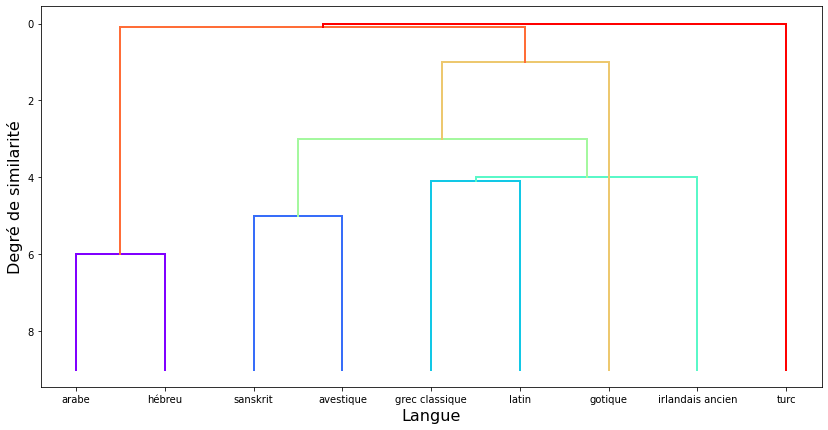

In [15]:
#@title Affichage du dendrogramme
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# Le degré de similarité utilisé / obtenu avec cet algorithme n'est pas exacte, 
# mais permet tout de même de donner une idée d'une représentation de la réalité.
def drawDendrogram(L, labels):
  # Initialise M avec les données obtenues de l'algorithme du dendrogramme et 
  # ajoute 0.1 à l'une des similarités lorsque deux sont égales.
  M = L.copy()
  for m in range(len(M)):
    for n in range(len(M)):
      if M[m][1] == M[n][1]  and  m != n:
        M[m] = (M[m][0], M[m][1] + 0.1)
  # Initialise R avec les positions x et y des objets
  R = [(x, len(M)+1) for x in range(len(M)+1)]
  
  # Prépare la figure
  plt.figure(figsize=(14,7))
  ax = plt.gca()
  l = labels.copy()
  l.insert(0, "")
  ax.set_xticklabels(l)
  plt.xlabel('Langue', fontsize=16)
  plt.ylabel('Degré de similarité', fontsize=16)
  plt.gca().invert_yaxis()
  color=cm.rainbow(np.linspace(0, 1, len(M)))
  
  # Dessine le dendrogramme
  for m, c in zip(M, color):
    line = plt.plot([R[m[0][0]][0], R[m[0][0]][0]], [R[m[0][0]][1], m[1]])
    plt.setp(line, color=c, linewidth=2.0)
    line = plt.plot([R[m[0][1]][0], R[m[0][1]][0]], [R[m[0][1]][1], m[1]])
    plt.setp(line, color=c, linewidth=2.0)
    line = plt.plot([R[m[0][0]][0], R[m[0][1]][0]], [m[1], m[1]])
    plt.setp(line, color=c, linewidth=2.0)
    # Mise à jour de la position x et y avec la nouvelle classe d'objets
    R[m[0][0]] = (R[m[0][0]][0] + ((R[m[0][1]][0] - R[m[0][0]][0]) / 2), m[1])
    R[m[0][1]] = (R[m[0][0]][0] + ((R[m[0][1]][0] - R[m[0][0]][0]) / 2), m[1])
  
  plt.show()

drawDendrogram(L, labels_languages)

En comparant le résultat obtenu à partir de ce premier algorithme avec le dendrogramme attendu, il est possible de constater une forte ressemblance.

## Partie 2

In [16]:
#@title Fonction utilisée dans l'algorithme du dendrogramme

#@markdown - maxSim2(P, I)
def maxSim2(P, I):
  max_sim = -1
  index_max_sim = 0
  for p in range(len(P)):
    if I[p] == p  and  P[p][0] > max_sim:
      max_sim = P[p][0]
      index_max_sim = p
  return index_max_sim

In [17]:
#@title Alternative d'algorithme de partitionnement hiérarchique agglomératif pour le lien unique
import numpy as np

S = np.array(similitude)[:].tolist()
N = len(S)
P = [(-1, 0)] * N
I = [0] * N
L = []

# Matrice de similarité
for i in range(N):
  for j in range(N):
    # P[i] contient ici seulement le document le plus proche de i et de sa similarité
    if i != j  and  P[i][0] < S[i][j]:
      P[i] = (S[i][j], j)
  # Indicateur de classe active
  I[i] = i

print("P (liste des priorités) : ")
print(P)

# Construction du dendrogramme
for k in range(N-1):
  x = maxSim2(P, I)
  y = I[P[x][1]]
  P[x] = (-1, P[x][1])
  # Ajout de (x, y) à l’ensemble des fusions
  L.append(([x, y], P[y][0]))
  for i in range(N):
    if I[i] == i  and  i != x  and  i != y:
      # Méthode du lien unique
      S[i][x] = max(S[i][x], S[i][y])
      S[x][i] = max(S[i][x], S[i][y])
    if I[i] == y:
      I[i] = x
    if I[i] == i  and  i != x  and  S[x][i] > P[x][0]:
      P[x] = (S[x][i], i)

print()
print("L (liens entre objets) : ")
print(L)

P (liste des priorités) : 
[(6, 1), (6, 0), (5, 3), (5, 2), (4, 5), (4, 4), (1, 2), (4, 5), (0, 0)]

L (liens entre objets) : 
[([0, 1], 6), ([2, 3], 5), ([4, 5], 4), ([4, 7], 4), ([2, 4], 3), ([2, 6], 1), ([0, 2], 0), ([0, 8], 0)]


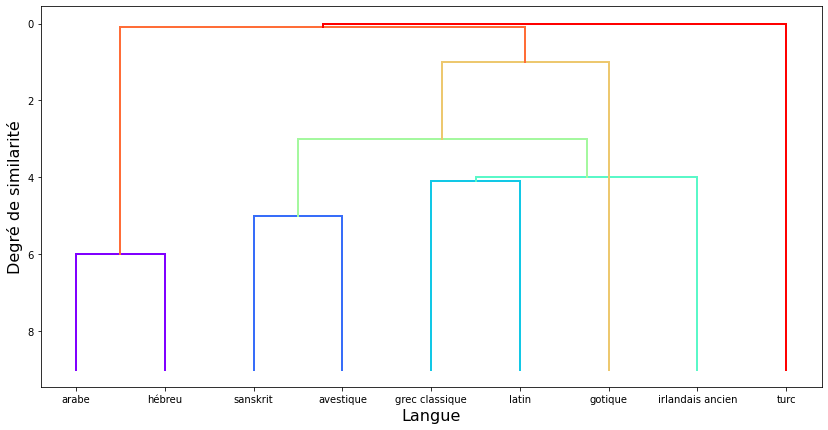

In [18]:
#@title Affichage du dendrogramme
drawDendrogram(L, labels_languages)

Le résultat obtenu avec ce second algorithme, tout comme avec le premier, semble être cohérent avec le dendrogramme attendu.

La complexité de la construction du dendrogramme dans cet algorithme est d'un ordre inférieur au premier algorithme.<br>
On obtient pour celui-ci O(n²) contre O(n² log(n)) pour le premier.